# Fashion MNIST Project

In [66]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [67]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [68]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

In [70]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [71]:
(trainX,trainY), (testX,testY) = fashion_mnist.load_data()

In [72]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\yasmi\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [73]:
train_images.shape

(60000, 28, 28, 1)

In [74]:
class_names = ['pants', 'sneakers','coat','shirt']

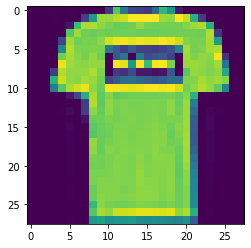

In [75]:
plt.imshow(trainX[1].reshape((28,28)))
plt.show()

# Logistic Regression Model

In [76]:
trainX = train_images.reshape((60000, 28, 28, 1))
testX = test_images.reshape((10000, 28, 28, 1))

The pixel values for the images lie between 0 to 255 now, which is a large range.

Let us normalize these values to a range from 0 to 1. To do this, we can simply divide each pixel value with 255

In [77]:
train_images_norm = trainX / 255.0

In [78]:
test_images_norm = testX / 255.0

In [79]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [80]:
image_train = trainX.reshape(60000,784)
image_test = testX.reshape(10000,784)

In [81]:
X_train = pd.DataFrame(image_train)
Y_train = trainY
X_test = pd.DataFrame(image_test)
Y_test = testY
print(Y_train)
X_train

[9 0 0 ... 3 0 5]


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


In [82]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(max_iter=1500)
logReg.fit(X_train,Y_train)

C:\Users\yasmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1500)

In [83]:
prediction_test  = logReg.predict(X_test)
prediction_train = logReg.predict(X_train)

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

In [85]:
print(accuracy_score(Y_train, prediction_train))

0.8809833333333333


In [86]:
print(accuracy_score(Y_test, prediction_test))

0.8344


In [ ]:
y_train_predict = log_clf.predict(prediction_train)

In [ ]:
log_accuracy = accuracy_score(Y_train, y_train_predict)
log_precision = precision_score(Y_train, y_train_predict, average='weighted')
log_recall = recall_score(Y_train, y_train_predict, average='weighted')
log_f1_score = f1_score(Y_train, y_train_predict, average='weighted')


print("Logistic Accuracy: ", log_accuracy)
print("Logistic Precision: ", log_precision)
print("Logistic Recall: ", log_precision)
print("Logistic F1 Score: ", log_f1_score)

# XGBoost Model

In [88]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators=300, n_jobs=-1, seed=0)
xgb_clf.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [89]:
y_pred = xgb_clf.predict(X_test)
print(accuracy_score(Y_test, y_pred))

0.9039


In [90]:
start = time.time()
xgb_clf = XGBClassifier(n_estimators=500, n_jobs=-1, learning_rate=0.5, seed=0)
xgb_clf.fit(X_train,Y_train)
stop = time.time()
print(xgb_clf.get_params)
print(f"Training time: {stop - start}s")

NameError: name 'time' is not defined

In [ ]:
y_pred = xgb_clf.predict(X_test)
print(accuracy_score(Y_test, y_pred))

In [ ]:
start = time.time()
xgb_clf = XGBClassifier(n_estimators=500, n_jobs=-1, learning_rate=0.5, max_deth= 5, min_child_weight= 1, seed=0)
xgb_clf.fit(X_train,Y_train)
stop = time.time()
print(xgb_clf.get_params)
print(f"Training time: {stop - start}s")
y_pred = xgb_clf.predict(X_test)
print("test accuracy")
print(accuracy_score(Y_test, y_pred))


In [ ]:
start = time.time()
xgb_clf = XGBClassifier(n_estimators=500, n_jobs=-1, learning_rate=0.5, max_deth= 5, min_child_weight= 1, seed=0)
xgb_clf.fit(x_train,y_train,eval_metric='mlogloss', early_stopping_rounds = 10, eval_set = [(x_test, y_test)])
stop = time.time()
print(xgb_clf.get_params)
print(f"Training time: {stop - start}s")
y_pred = xgb_clf.predict(x_test)
print("test accuracy")
print(accuracy_score(y_test, y_pred))

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dec_tree_clf = DecisionTreeClassifier(max_depth=50, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training dataset here
dec_tree_clf.fit(X_train, Y_train)

In [ ]:
# Let us predict some instance from the dataset using the above trained model
y_train_predict = dec_tree_clf.predict(X_train[0].reshape(1, -1))

In [ ]:
showImage(X_train[0])

In [ ]:
y_train_predict = dec_tree_clf.predict(X_train)

In [ ]:
dec_tree_accuracy = accuracy_score(y_train, y_train_predict)
dec_tree_precision = precision_score(y_train, y_train_predict, average='weighted')
dec_tree_recall = recall_score(y_train, y_train_predict, average='weighted')
dec_tree_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Decision Tree Accuracy: ", dec_tree_accuracy)
print("Decision Tree Precision: ", dec_tree_precision)
print("Decision Tree Recall: ", dec_tree_precision)
print("Decision Tree F1 Score: ", dec_tree_f1_score)

# Random Forest Classifier